**Project Title:-Santander Customer Transaction Prediction using Python**

**Problem Statement:-** Here, we need to identify which customers will make a specific transaction in
the future, irrespective of the amount of money transacted.


In [1]:
#Loading Libraries:-

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
import eli5

from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from pdpbox import pdp, get_dataset, info_plots
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report,roc_curve,auc


random_state=42
np.random.seed(random_state)
import warnings
warnings.filterwarnings('ignore')


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [1]:
os.chdir("G:/Data Science Project")

NameError: name 'os' is not defined

In [3]:
os.getcwd()

'G:\\Data Science Project'

Importing the train dataset

In [4]:
df_train=pd.read_csv("train.csv")
pd.options.display.max_columns = None

In [5]:
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

In [6]:
#Shape of the dataset
df_train.shape

(200000, 202)

In [7]:
#Summary of the dataset
df_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2000

**Target Class Count**

In [8]:
#Target Class Count
target_class=df_train['target'].value_counts()
print('Count of the target class :\n',target_class)

#Percentage of target class count
per_target_class=df_train['target'].value_counts()/len(df_train)*100
print('Percentage of target class count :\n',per_target_class)

Count of the target class :
 0    179902
1     20098
Name: target, dtype: int64
Percentage of target class count :
 0    89.951
1    10.049
Name: target, dtype: float64


Text(0, 0.5, 'Index')

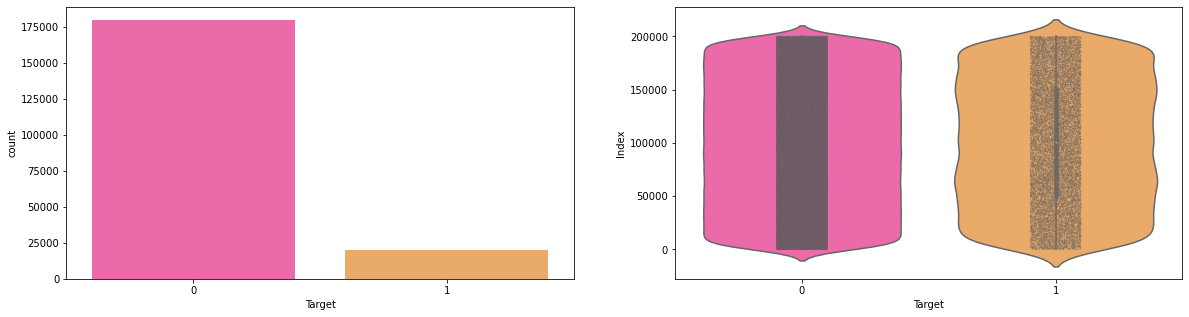

In [9]:
#Count plot & violin plot for target class
fig,ax=plt.subplots(1,2,figsize=(20,5))
sns.countplot(df_train.target.values,ax=ax[0],palette='spring')
sns.violinplot(x=df_train.target.values,y=df_train.index.values,ax=ax[1],palette='spring')
sns.stripplot(x=df_train.target.values,y=df_train.index.values,jitter=True,color='black',linewidth=0.5,size=0.5,alpha=0.5,ax=ax[1],palette='spring')
ax[0].set_xlabel('Target')
ax[1].set_xlabel('Target')
ax[1].set_ylabel('Index')

**Observation**:

    - We are having a unbalanced data, where 90% of the data is no. of customers who will not make a transaction & 10 % of  
      the data are those who will make a transaction.
    - From the violin plots, it seems that there is no relationship between the target and index of the data frame, it is 
      more dominated by zero compare to one's.
    - From the jitter plots with violin plots, we can observe that target looks uniformly distributed over the indexes of   
      the data frame.

**Distribution of train attributes**

In [10]:
%%time 

#Distribution of train attributes-

def plot_train_attribute_distribution(t0,t1,label1,label2,train_attributes):
    i=0
    sns.set_style('darkgrid')
    
    fig=plt.figure()
    ax=plt.subplots(10,10,figsize=(22,18))
    
    for attribute in train_attributes :
        i+=1
        plt.subplot(10,10,i)
        sns.distplot(t0[attribute],hist=False,label=label1)
        sns.distplot(t1[attribute],hist=False,label=label2)
        plt.legend()
        plt.xlabel('Attribute',)
        sns.set_style("ticks",{"xtick.major.size": 8, "ytick.major.size": 8})
    plt.show()

Wall time: 0 ns


**Observing first 100 train attributes**

<Figure size 432x288 with 0 Axes>

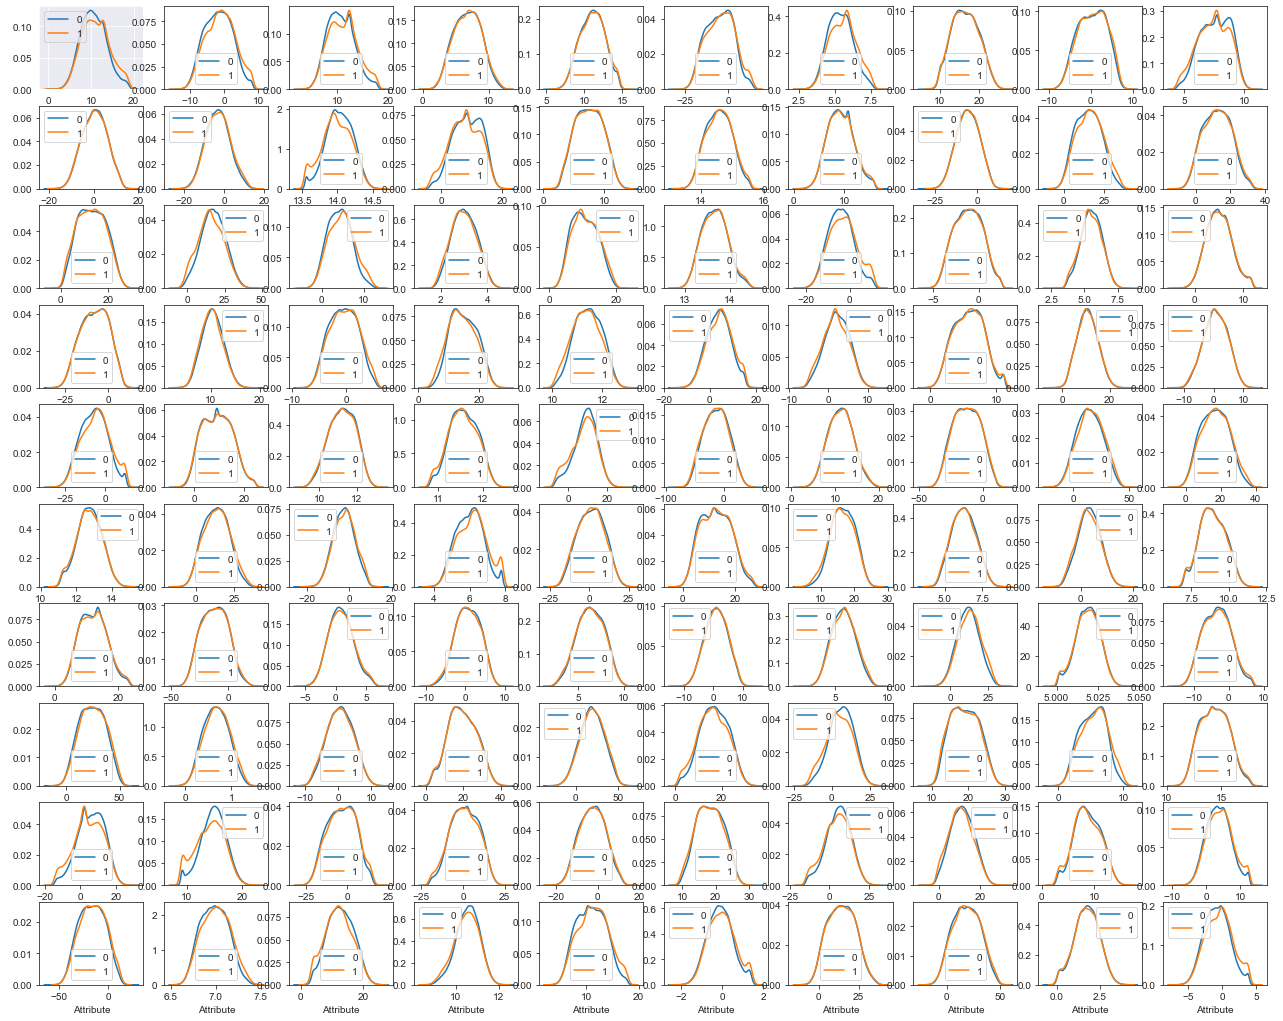

Wall time: 23.9 s


In [11]:
%%time
#Corresponding to negative class-
t0=df_train[df_train.target.values==0]

#Corresponding to possitive class-
t1=df_train[df_train.target.values==1]

#train attributes from 2 to 102 -
train_attributes=df_train.columns.values[2:102]

#Plot distribution of train attributes-
plot_train_attribute_distribution(t0,t1,'0','1',train_attributes)

**Observing next 100 train attributes**

<Figure size 432x288 with 0 Axes>

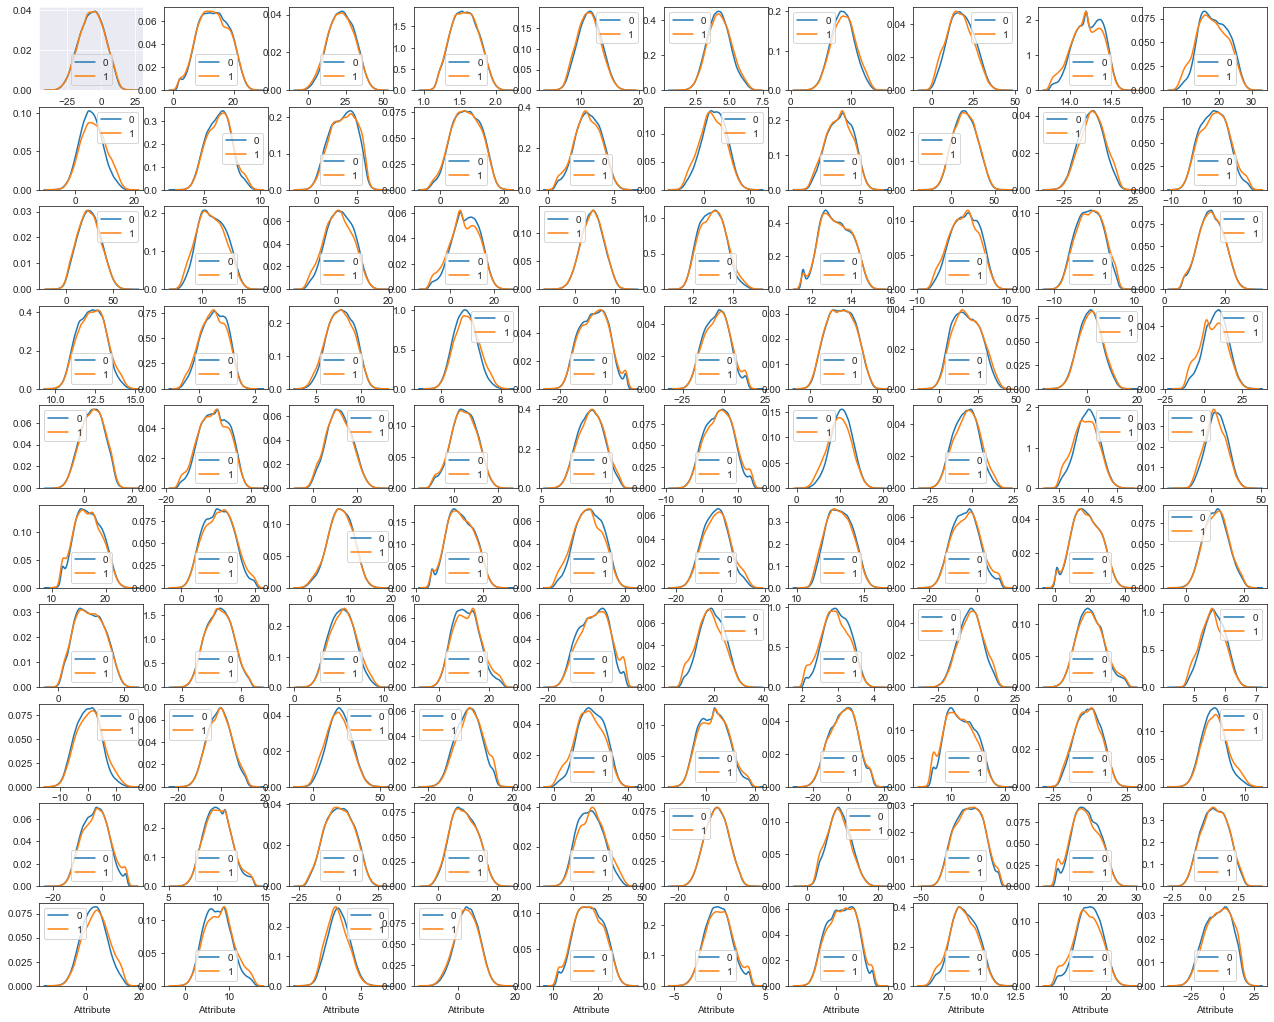

In [12]:
#train attributes from 102 to 202 -
train_attributes=df_train.columns.values[102:202]

#Plot distribution of train attributes-
plot_train_attribute_distribution(t0,t1,'0','1',train_attributes)

**Observation:**
    - We can observed that their is a considerable no. of features which are significantly have different distribution for two target variables. For example like var_0,var_1,var_9,var_198 var_180 etc.
    - We can observed that their is a considerable number of features which are significantly have same distribution for two target variables. For example like var_3,var_7,var_10,var_171,var_185 etc.

**Importing the test dataset:-**

In [13]:
#Importing the test dataset:-
df_test=pd.read_csv("test.csv")

In [14]:
df_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,8.7625,-15.6305,18.8766,11.2864,11.8362,13.3680,-31.9891,12.1776,8.7714,17.2011,16.8508,13.0534,14.4069,-4.8525,7.3213,-0.5259,16.6365,19.3036,6.4129,-5.3948,9.3269,11.9314,-3.5750,-0.7706,0.8705,6.9282,2.8914,5.9744,17.4851,5.0125,-1.4230,33.3401,0.8018,-4.7906,30.2708,26.8339,21.7205,7.3075,14.0810,3.1192,17.4265,9.4883,16.9060,14.5117,10.0276,-0.9706,20.4588,4.7945,20.4160,13.1633,7.9307,-7.6509,7.0834,15.2324,10.1416,5.9156,-0.5775,5.7600,30.3238,2.1251,1.8585,-9.2198,17.3089,30.9548,1.4918,12.8721,3.4902,8.2856,11.9794,14.0176,15.0763,3.7662,6.0426,4.4243,14.1799,2.0921,1.5493,3.2206,0.0172,-6.6602,8.4785,42.0248,11.4164,0.4564,9.4006,0.9685,12.4929,14.1240,4.0388,-4.4442,16.6684,12.5380,0.9205,10.5998,7.5147,-4.1748,-0.4824,10.5267,17.7547,-6.5226,-2.5502,-5.1547,-2.1246,19.8319,13.0752,9.2275,3.0213,11.6793,-11.6827,4.1017,5.2954,18.7741,9.8892,7.5219,14.9745,18.9880,1.0842,11.9125,-4.5103,16.1361,11.0067,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,-1.5536,10.0309,3.1337,10.5742,11.7664,2.1782,-41.1924,13.5322,-17.3834,6.3806,12.5589,11.6887,25.3930,1.5776,6.8481,8.7348,16.4239,21.7056,6.9345,1.6678,9.5249,5.3383,-18.7083,1.3382,-1.7401,5.8398,3.1051,4.4307,16.0005,5.0306,-7.3365,12.2806,0.6992,-0.7772,21.5123,6.7803,18.1896,6.9388,22.1336,6.3755,13.1525,1.9772,14.0406,6.6904,9.9732,-11.5679,20.4525,9.4951,9.6343,8.1252,2.6059,-17.4201,7.1848,15.3484,10.6522,5.9897,0.3392,10.3516,29.8204,1.9998,-1.4166,-1.7257,15.4712,35.6020,1.6570,13.0783,2.7752,6.4986,4.6835,13.7963,17.7261,1.7375,5.5689,3.6609,8.9725,4.1159,1.0693,2.0234,8.2760,-6.8610,0.2780,17.0488,11.6704,3.1215,8.5093,5.6367,12.0099,14.2372,-

In [15]:
#Shape of the dataset-
df_test.shape

(200000, 201)

In [16]:
%%time 

#Distribution of test attributes-

def plot_test_attribute_distribution(test_attributes):
    i=0
    sns.set_style('darkgrid')
    
    fig=plt.figure()
    ax=plt.subplots(10,10,figsize=(22,18))
    
    for attribute in test_attributes:
        i+=1
        plt.subplot(10,10,i)
        sns.distplot(df_test[attribute],hist=False)
        plt.xlabel('Attribute',)
        sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    plt.show()

Wall time: 0 ns


**Observing first 100 test attributes:**

<Figure size 432x288 with 0 Axes>

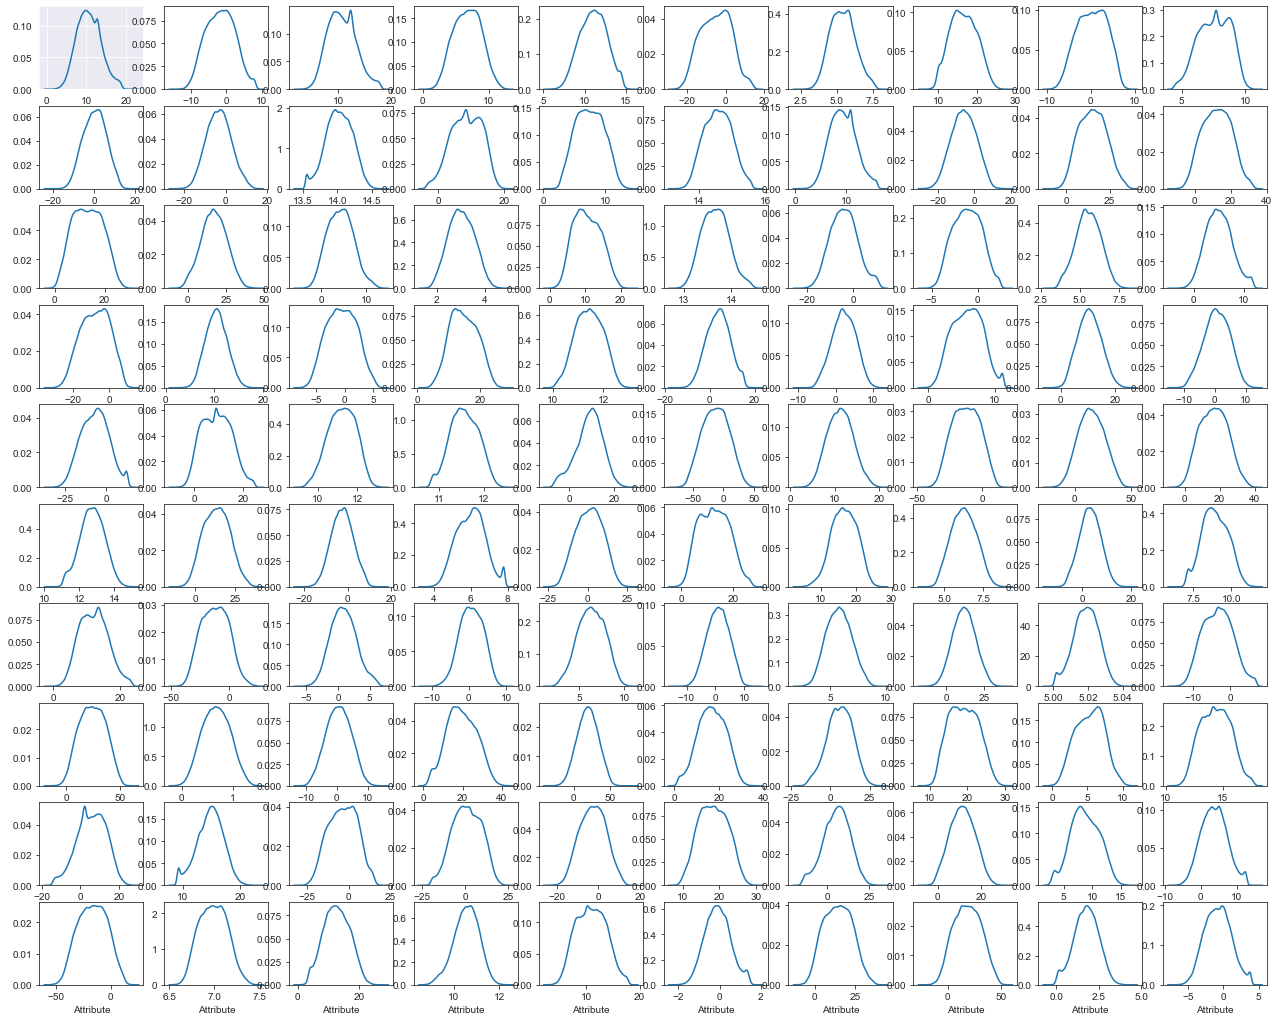

Wall time: 20.8 s


In [17]:
%%time
#test attribiutes from 1 to 101 -
test_attributes=df_test.columns.values[1:101]

#Plot distribution of test attributes -
plot_test_attribute_distribution(test_attributes)

**Observing next 100 test attributes:**

<Figure size 432x288 with 0 Axes>

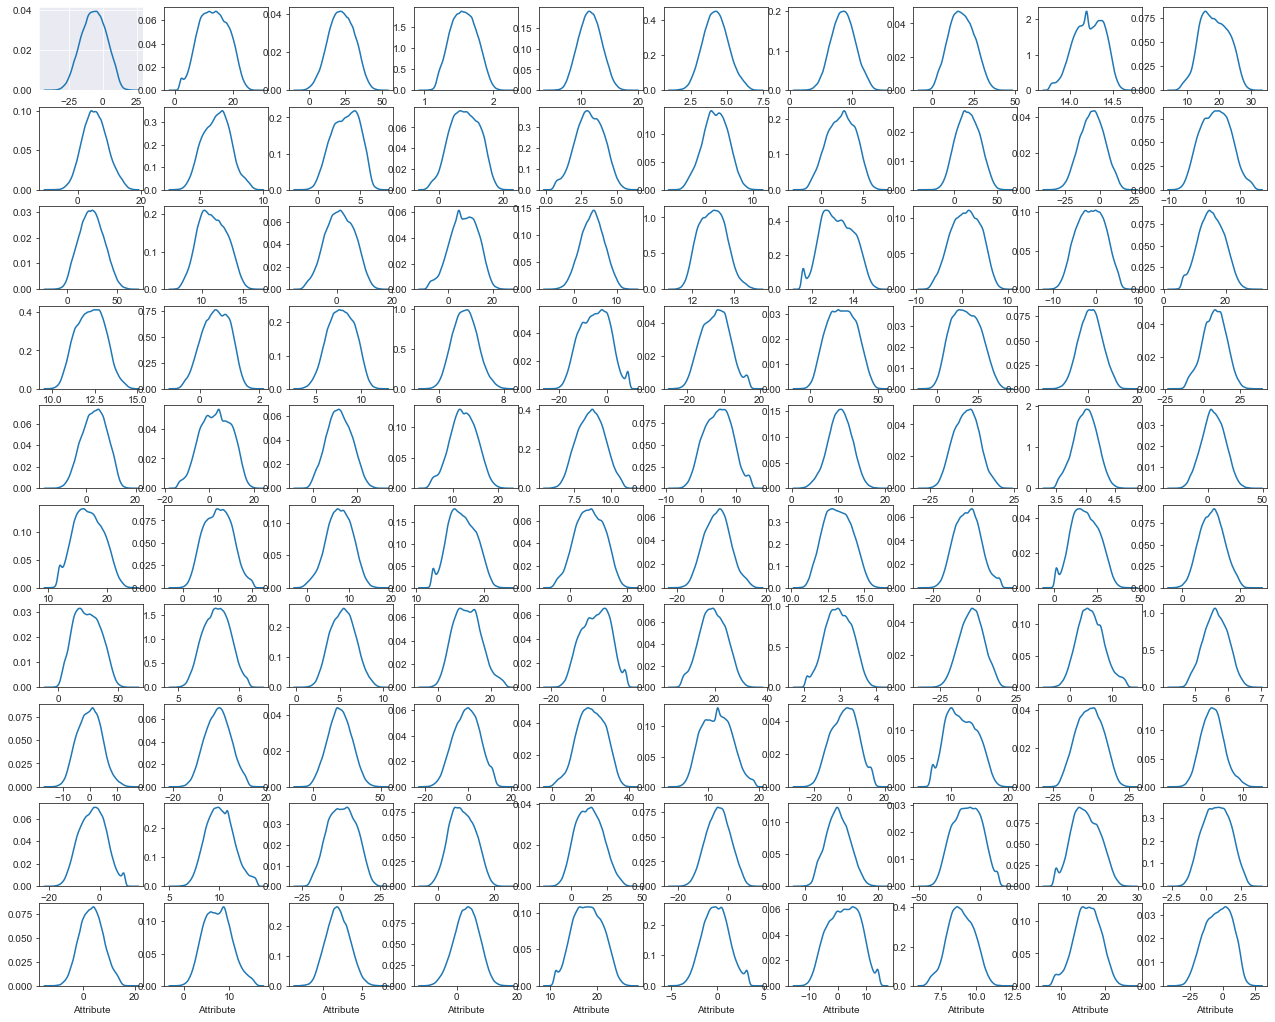

Wall time: 21 s


In [18]:
%%time
#test attributes from 101 to 202-
test_attributes=df_test.columns.values[101:202]

#Plot the distribution of test attributes-
plot_test_attribute_distribution(test_attributes)

**Distribution of Mean Values per rows & columns:**

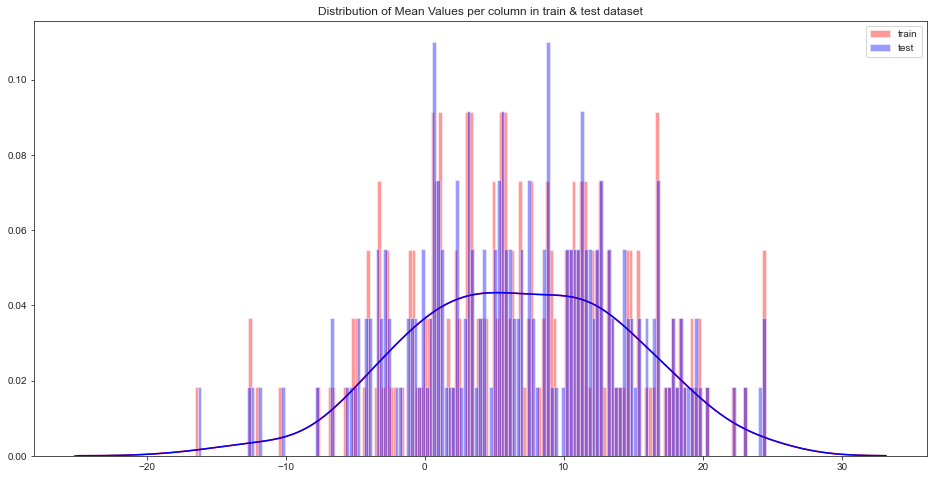

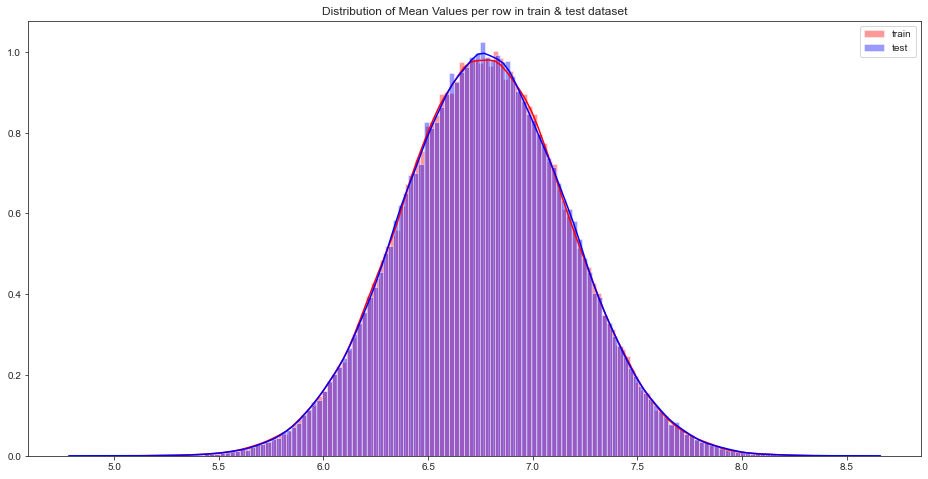

Wall time: 3.92 s


In [19]:
%%time
#Distribution of Mean Values per column in train & test dataset:-
plt.figure(figsize=(16,8))

#Train attributes-
train_attributes=df_train.columns.values[2:202]

#Test attributes-
test_attributes=df_test.columns.values[1:201]

#Distribution plot for mean values per column in train attributes:
sns.distplot(df_train[train_attributes].mean(axis=0),color='red',kde=True,bins=150,label='train')

#Distribution plot for mean values per column in test attributes:
sns.distplot(df_test[test_attributes].mean(axis=0),color='blue',kde=True,bins=150,label='test')

plt.title('Distribution of Mean Values per column in train & test dataset')
plt.legend()
plt.show()


#Distribution of Mean Values per column in train & test dataset:-
plt.figure(figsize=(16,8))

#Distribution plot for mean values per rows in train attributes:
sns.distplot(df_train[train_attributes].mean(axis=1),color='red',kde=True,bins=150,label='train')

#Distribution plot for mean values per rows in test attributes:
sns.distplot(df_test[test_attributes].mean(axis=1),color='blue',kde=True,bins=150,label='test')

plt.title('Distribution of Mean Values per row in train & test dataset')
plt.legend()
plt.show()

**Distribution of Standard Deviation Values per rows & columns:**

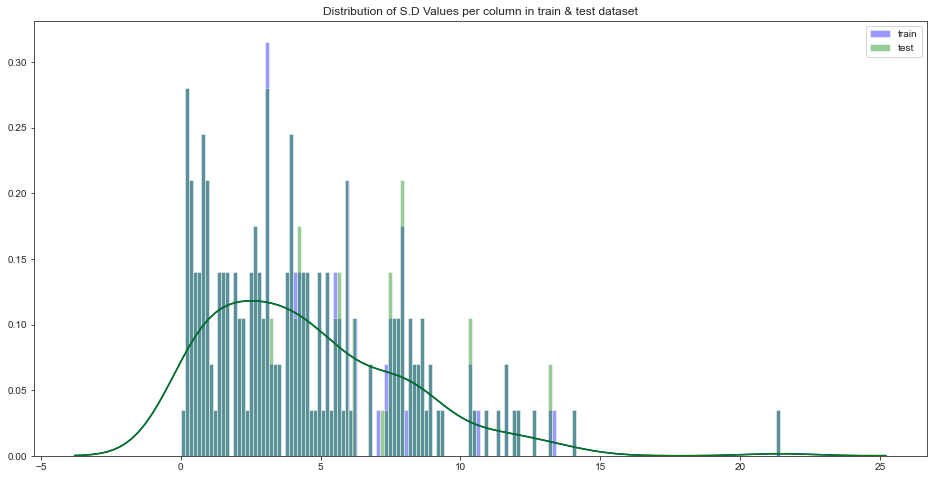

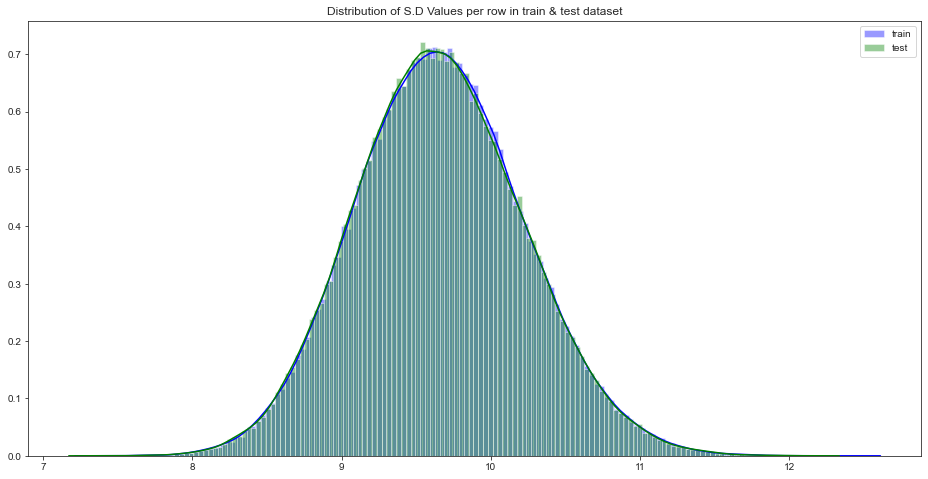

Wall time: 3.86 s


In [20]:
%%time
#Distribution of S.D Values per column in train & test dataset:-
plt.figure(figsize=(16,8))

#Train attributes-
train_attributes=df_train.columns.values[2:202]

#Test attributes-
test_attributes=df_test.columns.values[1:201]

#Distribution plot for S.D values per column in train attributes:
sns.distplot(df_train[train_attributes].std(axis=0),color='blue',kde=True,bins=150,label='train')

#Distribution plot for S.D values per column in test attributes:
sns.distplot(df_test[test_attributes].std(axis=0),color='green',kde=True,bins=150,label='test')

plt.title('Distribution of S.D Values per column in train & test dataset')
plt.legend()
plt.show()


#Distribution of S.D Values per column in train & test dataset:-
plt.figure(figsize=(16,8))

#Distribution plot for S.D values per rows in train attributes:
sns.distplot(df_train[train_attributes].std(axis=1),color='blue',kde=True,bins=150,label='train')

#Distribution plot for S.D values per rows in test attributes:
sns.distplot(df_test[test_attributes].std(axis=1),color='green',kde=True,bins=150,label='test')

plt.title('Distribution of S.D Values per row in train & test dataset')
plt.legend()
plt.show()

**Distribution of Skewness Values per rows & columns:**

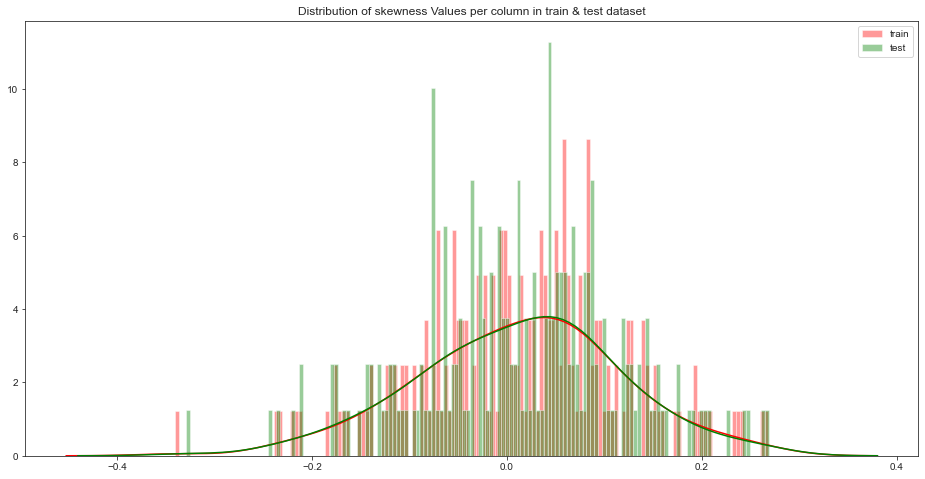

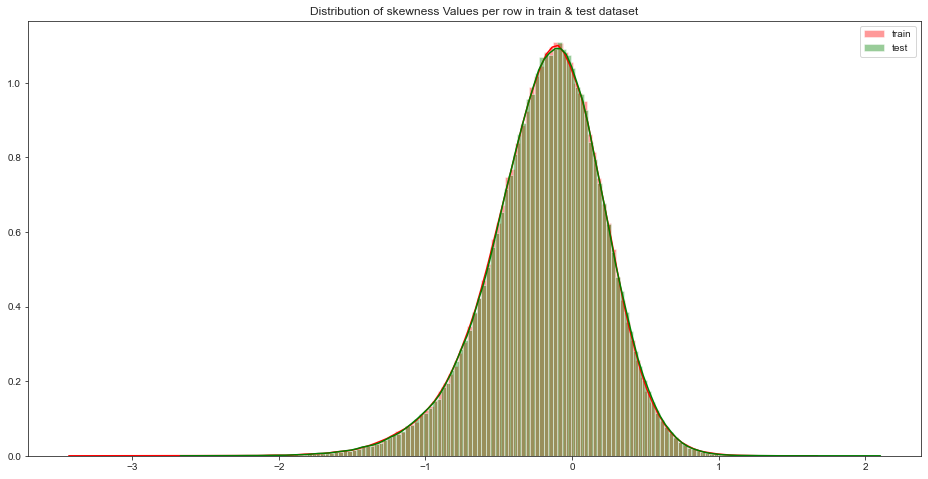

Wall time: 10.4 s


In [21]:
%%time
#Distribution of skew Values per column in train & test dataset:-
plt.figure(figsize=(16,8))

#Train attributes-
train_attributes=df_train.columns.values[2:202]

#Test attributes-
test_attributes=df_test.columns.values[1:201]

#Distribution plot for skew values per column in train attributes:
sns.distplot(df_train[train_attributes].skew(axis=0),color='red',kde=True,bins=150,label='train')

#Distribution plot for skew values per column in test attributes:
sns.distplot(df_test[test_attributes].skew(axis=0),color='green',kde=True,bins=150,label='test')

plt.title('Distribution of skewness Values per column in train & test dataset')
plt.legend()
plt.show()


#Distribution of skew Values per column in train & test dataset:-
plt.figure(figsize=(16,8))

#Distribution plot for skew values per rows in train attributes:
sns.distplot(df_train[train_attributes].skew(axis=1),color='red',kde=True,bins=150,label='train')

#Distribution plot for skew values per rows in test attributes:
sns.distplot(df_test[test_attributes].skew(axis=1),color='green',kde=True,bins=150,label='test')

plt.title('Distribution of skewness Values per row in train & test dataset')
plt.legend()
plt.show()

**Distribution of kurtosis Values per rows & columns:**

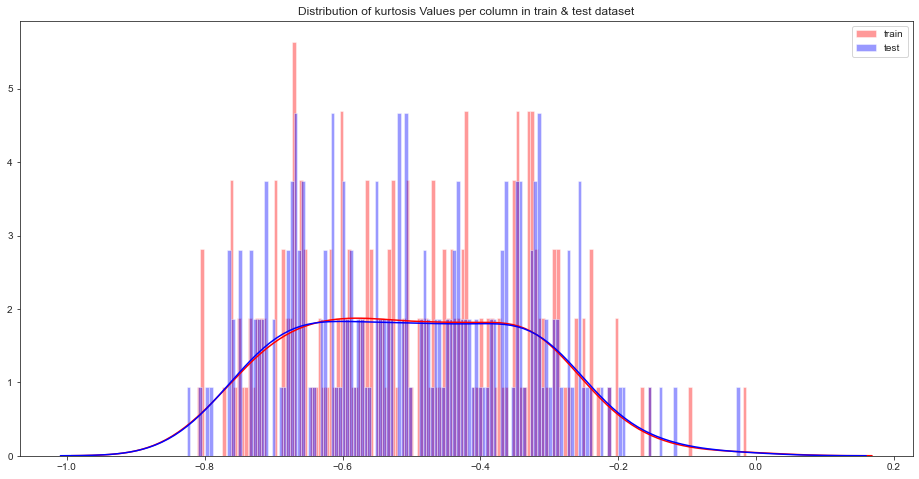

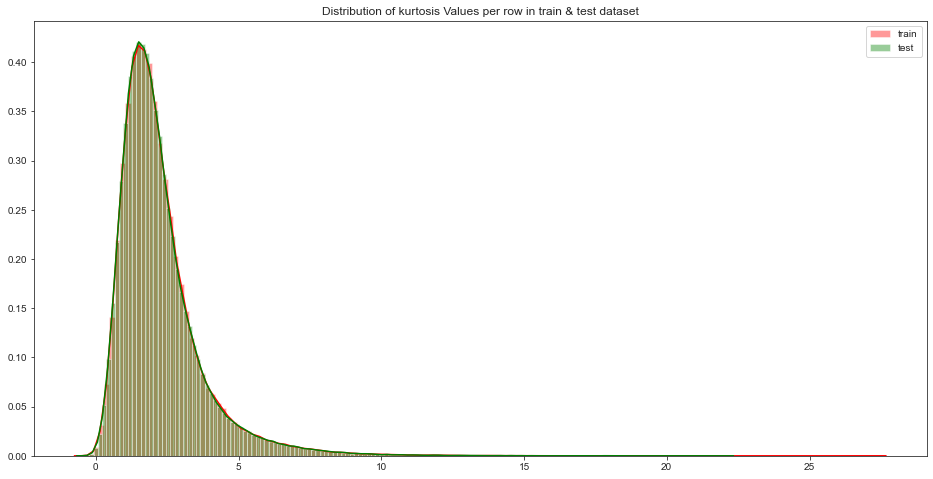

Wall time: 9.82 s


In [22]:
%%time
#Distribution of kurtosis Values per column in train & test dataset:-
plt.figure(figsize=(16,8))

#Train attributes-
train_attributes=df_train.columns.values[2:202]

#Test attributes-
test_attributes=df_test.columns.values[1:201]

#Distribution plot for kurtosis values per column in train attributes:
sns.distplot(df_train[train_attributes].kurtosis(axis=0),color='red',kde=True,bins=150,label='train')

#Distribution plot for kurtosis values per column in test attributes:
sns.distplot(df_test[test_attributes].kurtosis(axis=0),color='blue',kde=True,bins=150,label='test')

plt.title('Distribution of kurtosis Values per column in train & test dataset')
plt.legend()
plt.show()


#Distribution of kurtosis Values per column in train & test dataset:-
plt.figure(figsize=(16,8))

#Distribution plot for kurtosis values per rows in train attributes:
sns.distplot(df_train[train_attributes].kurtosis(axis=1),color='red',kde=True,bins=150,label='train')

#Distribution plot for kurtosis values per rows in test attributes:
sns.distplot(df_test[test_attributes].kurtosis(axis=1),color='green',kde=True,bins=150,label='test')

plt.title('Distribution of kurtosis Values per row in train & test dataset')
plt.legend()
plt.show()

**Missing Value Analysis-**

In [23]:
%%time
#Finding the missing values in train & test dataset:-
train_missing=df_train.isnull().sum().sum()
test_missing=df_test.isnull().sum().sum()

print('Missing values in train data:',train_missing)
print('Missing values in test data:',test_missing)

Missing values in train data: 0
Missing values in test data: 0
Wall time: 428 ms


**Observation:** No missing value is present in both train & test data.

**Correlation between the attributes:**

In [24]:
%%time
#Correlation in train attiributes-
train_attributes=df_train.columns.values[2:202]
train_correlation=df_train[train_attributes].corr().abs().unstack().sort_values(kind='quicksort').reset_index()
train_correlation=train_correlation[train_correlation['level_0']!=train_correlation['level_1']]
print(train_correlation.head(10))
print(train_correlation.tail(10))

   level_0  level_1             0
0   var_75  var_191  2.703975e-08
1  var_191   var_75  2.703975e-08
2  var_173    var_6  5.942735e-08
3    var_6  var_173  5.942735e-08
4  var_126  var_109  1.313947e-07
5  var_109  var_126  1.313947e-07
6  var_144   var_27  1.772502e-07
7   var_27  var_144  1.772502e-07
8  var_177  var_100  3.116544e-07
9  var_100  var_177  3.116544e-07
       level_0  level_1         0
39790  var_183  var_189  0.009359
39791  var_189  var_183  0.009359
39792  var_174   var_81  0.009490
39793   var_81  var_174  0.009490
39794   var_81  var_165  0.009714
39795  var_165   var_81  0.009714
39796   var_53  var_148  0.009788
39797  var_148   var_53  0.009788
39798   var_26  var_139  0.009844
39799  var_139   var_26  0.009844
Wall time: 31.3 s


**Observation:** Its visible that correlation between train attributes is very small.

In [25]:
%%time
#Correlation in test attiributes-
test_attributes=df_test.columns.values[1:201]
test_correlation=df_test[train_attributes].corr().abs().unstack().sort_values(kind='quicksort').reset_index()
test_correlation=test_correlation[test_correlation['level_0']!=test_correlation['level_1']]
print(test_correlation.head(10))
print(test_correlation.tail(10))

   level_0  level_1             0
0  var_154  var_175  1.477268e-07
1  var_175  var_154  1.477268e-07
2  var_188  var_113  1.639749e-07
3  var_113  var_188  1.639749e-07
4  var_131    var_8  4.695407e-07
5    var_8  var_131  4.695407e-07
6   var_60  var_189  9.523709e-07
7  var_189   var_60  9.523709e-07
8  var_159   var_96  1.147835e-06
9   var_96  var_159  1.147835e-06
       level_0  level_1         0
39790  var_122  var_164  0.008513
39791  var_164  var_122  0.008513
39792  var_164    var_2  0.008614
39793    var_2  var_164  0.008614
39794   var_31  var_132  0.008714
39795  var_132   var_31  0.008714
39796   var_96  var_143  0.008829
39797  var_143   var_96  0.008829
39798  var_139   var_75  0.009868
39799   var_75  var_139  0.009868
Wall time: 29.8 s


**Observation:** Its visible that correlation between test attributes is very small.

**Correlation plot for train and test data:**

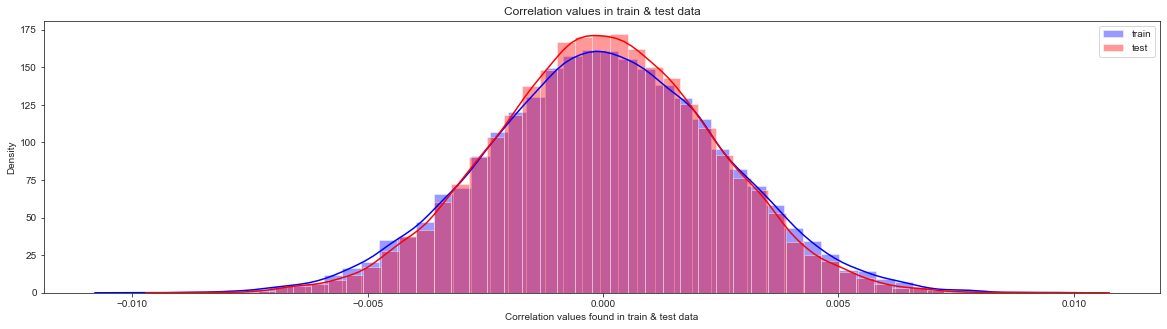

In [26]:
train_correlation=df_train[train_attributes].corr()
train_correlation=train_correlation.values.flatten()
train_correlation=train_correlation[train_correlation!=1]


test_correlation=df_test[test_attributes].corr()
test_correlation=test_correlation.values.flatten()
test_correlation=test_correlation[test_correlation!=1]

plt.figure(figsize=(20,5))
sns.distplot(train_correlation,color="blue",label="train")
sns.distplot(test_correlation,color="red",label="test")
plt.xlabel("Correlation values found in train & test data")
plt.ylabel("Density")
plt.title ("Correlation values in train & test data")
plt.legend()

**Observation:The correlation between the train and test data is very small, its completely visible from the above graph**

**Feature Engineering :-**
Performing feature engineering by using-
    - Permutation Importance
    - Partial dependence plots

In [27]:
#Training & testing data:
X=df_train.drop(columns=['ID_code','target'],axis=1)
test=df_test.drop(columns=['ID_code'],axis=1)
y=df_train['target']

**Building a simple model to find the features which are more important:**

In [28]:
#Split the train data:-
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

**Random Forest Classifier:-**

In [29]:
%%time
rf_model=RandomForestClassifier(n_estimators=10,random_state=42)

#fitting the model:-
rf_model.fit(X_test,y_test)

Wall time: 27.9 s


RandomForestClassifier(n_estimators=10, random_state=42)

**Calucating weights & Observing some Important features via using eli5 library-** ELI5 is a Python package which helps to debug machine learning classifiers and explain their predictions.

In [30]:
%%time
#Permutation Importance:-
from eli5.sklearn import PermutationImportance
perm_imp=PermutationImportance(rf_model,random_state=42)

#fitting the model:-
perm_imp.fit(X_test,y_test)

Wall time: 5min 28s


PermutationImportance(estimator=RandomForestClassifier(n_estimators=10,
                                                       random_state=42),
                      random_state=42)

In [31]:
#Important Features:-
eli5.show_weights(perm_imp,feature_names=X_test.columns.tolist(),top=200)

Weight,Feature
0.0190 ± 0.0009,var_81
0.0174 ± 0.0005,var_139
0.0129 ± 0.0006,var_110
0.0112 ± 0.0008,var_53
0.0102 ± 0.0002,var_44
0.0094 ± 0.0004,var_76
0.0080 ± 0.0008,var_2
0.0077 ± 0.0009,var_148
0.0076 ± 0.0003,var_170
0.0076 ± 0.0003,var_12


**Observation:-**
    - Importance of features is decreasing as we move down the top of column.
    - Fetaures showing in green indicates they are having positive impact on our prediction.
    - Features showing in white showing they have no impact on prediction.
    - Most imprtant feature is var_81.

**Partial Dependence Plots :-** PDP gives a graphical depiction of marginal effect of a variable on the class probability or classification.
    It shows how a feature effects predictions.

In [32]:
#Calculation of partial dependence plots on random forest:-
#we are observing impact of main features which are discovered in previous section by using PDP Plot.


features=[v for v in X_test.columns if v not in ['ID_code','target']]
pdp_data=pdp.pdp_isolate(rf_model, dataset=X_test, model_features=features, feature='var_6')

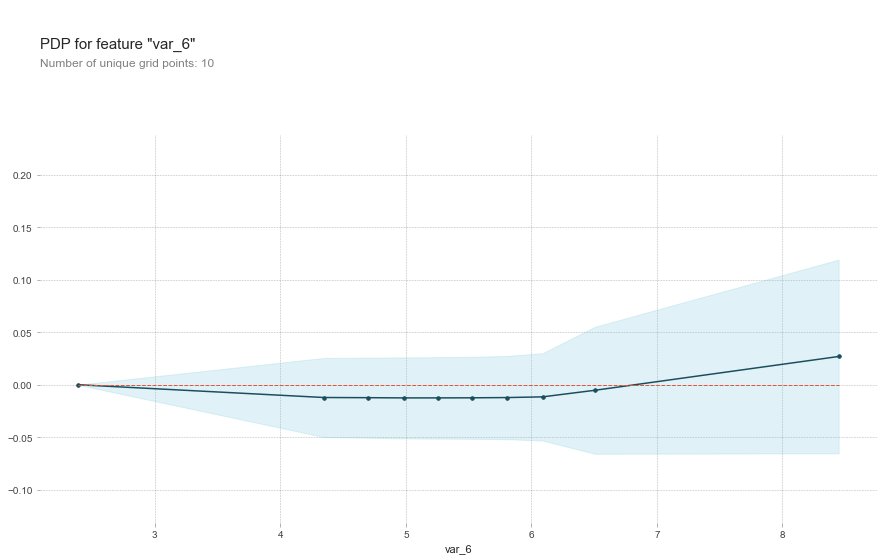

In [33]:
#Plot feature for var_6:-
pdp.pdp_plot(pdp_data,'var_6')
plt.show()

**Observation-**
    - The y axis dosen't show the predictor value instead how the value changing with the change in given predictor variable.
    - The blue shaded area indicates level of confidence of var_6.
    - On y-axis having a +ve value means for that particular value of predictor vriable its is less likely to predict the correct class & having & having a +ve value means it has +ve impact on predicting the correct class.

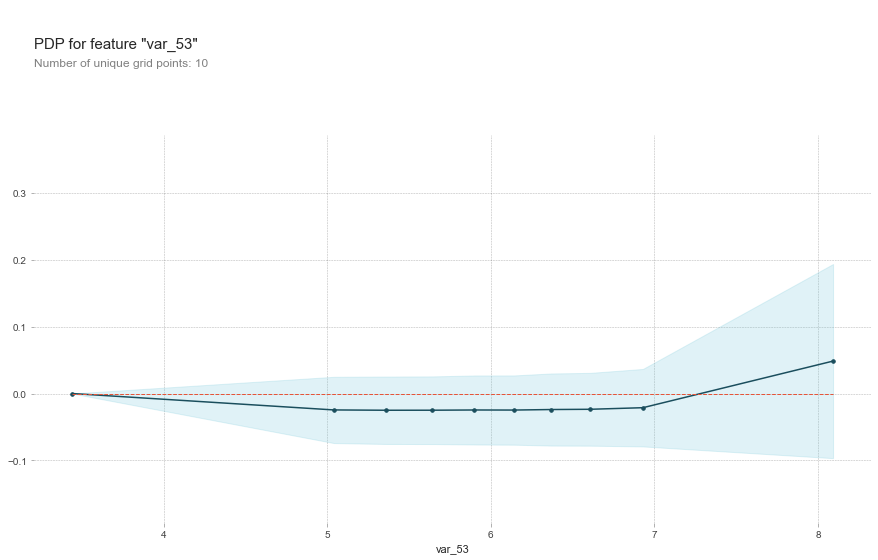

In [34]:
#Plot feature for var_53:-
pdp_data=pdp.pdp_isolate(rf_model, dataset=X_test, model_features=features, feature='var_53')
pdp.pdp_plot(pdp_data,'var_53')
plt.show()

**Observation-**
    - The y axis dosen't show the predictor value instead how the value changing with the change in given predictor variable.
    - The blue shaded area indicates level of confidence of var_53.
    - On y-axis having a +ve value means for that particular value of predictor vriable its is less likely to predict the correct class & having & having a +ve value means it has +ve impact on predicting the correct class.

**Handling of imblanced data:-** We are going to use multiple approaches for dealing with imbalanced datasets.
    
    - Change of performance matrix.
    - Oversample minority class.
    - Undersample majority class.
    - SMOTE ( Synthetic Minority Oversampling technique)
    - Change of algorithm.

**Logistic Regression Model:-**

In [35]:
#Spliting the data via Sratified KFold Cross Validator:-

#Training Data:
X=df_train.drop(['ID_code','target'],axis=1)
Y=df_train['target']

#Stratified KFold Cross Validator:-
skf=StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for train_index, valid_index in skf.split(X,Y): 
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index] 
    y_train, y_valid = Y.iloc[train_index], Y.iloc[valid_index]
    
print('Shape of X_train :',X_train.shape)
print('Shape of X_valid :',X_valid.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of y_valid :',y_valid.shape)

Shape of X_train : (160000, 200)
Shape of X_valid : (40000, 200)
Shape of y_train : (160000,)
Shape of y_valid : (40000,)


**Logistic Regression Model:-**

In [36]:
%%time
lr_model=LogisticRegression(random_state=42)
#fitting the model-
lr_model.fit(X_train,y_train)

Wall time: 6.86 s


LogisticRegression(random_state=42)

In [37]:
#Accuracy of model-
lr_score=lr_model.score(X_train,y_train)
print('Accuracy of lr_model :',lr_score)

Accuracy of lr_model : 0.9122


In [38]:
%%time
#Cross validation prediction of lr_model-
cv_predict=cross_val_predict(lr_model,X_valid,y_valid,cv=5)
#Cross validation score-
cv_score=cross_val_score(lr_model,X_valid,y_valid,cv=5)
print('cross val score :',np.average(cv_score))

cross val score : 0.910425
Wall time: 12.5 s


- Accuracy of the model is not th best metric to use while evaluating the imbalanced datasets as it may be misleading.
  We are going to change the performance metric.

**Confusion Matrix:-**

In [39]:
#Confusion matrix:-
cm=confusion_matrix(y_valid,cv_predict)
cm=pd.crosstab(y_valid,cv_predict)
cm

col_0,0,1
target,,
0,35491,489
1,3094,926


In [40]:
#ROC_AUC SCORE:-
roc_score=roc_auc_score(y_valid,cv_predict)
print('ROC Score:',roc_score)

ROC Score: 0.6083786874410604


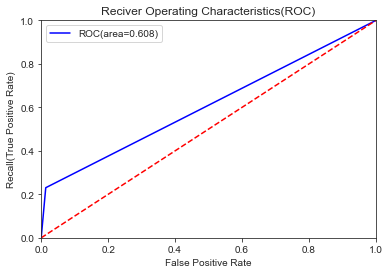

AUC: 0.6083786874410604


In [41]:
#ROC_AUC_Curve:-
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_valid,cv_predict)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

**Observation:-** On comparing roc_auc_score and model accuracy, model is not performing well on imbalanced data.

In [42]:
#Classification report:-
classification_scores=classification_report(y_valid,cv_predict)
print(classification_scores)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35980
           1       0.65      0.23      0.34      4020

    accuracy                           0.91     40000
   macro avg       0.79      0.61      0.65     40000
weighted avg       0.89      0.91      0.89     40000



**Observation:-** As we see that f1 score is high for the customers who will not make a transaction, compare to those who will make a transaction.
    So, we are going to change the algorithm.

In [43]:
%%time
#Model performance on test data:-
X_test=df_test.drop(['ID_code'],axis=1)
lr_pred=lr_model.predict(X_test)
print(lr_pred)

[0 0 0 ... 0 0 0]
Wall time: 394 ms


**Oversample Minority Class:-** 

    -Adding more copies of minority class.
    -It can be a good option we dont have that much large data to work.
    -Drawback of this process is we are adding info. That can lead to overfitting or poor performance on test data.

**Undersample Mojorityclass:-**
    
    -Removing some copies of majority class.
    -It can be a good option if we have very large amount of data say in millions to work.
    -Drawback of this process is we are removing some valuable info. that can leads to underfitting & poor performance on        test data.

As per the drawbacks of both the model we will use SMOTE ( Synthetic Minority Oversampling technique) that is more best than the above as compare to above one's.

**SMOTE ( Synthetic Minority Oversampling technique):-** This is a statistical technique for increasing the number of cases in your dataset in a balanced way. It uses a nearest neighbors algorithm to generate new and synthetic data to used for training the model.

In [48]:
%%time
from imblearn.over_sampling import SMOTE
#SMOTE:-
sm = SMOTE(random_state=42)
#Generating synthetic data points
X_smote,y_smote=sm.fit_sample(X_train,y_train)
X_smote_v,y_smote_v=sm.fit_sample(X_valid,y_valid)

Wall time: 3min 21s


**Building Logistsic regression model on synthetic data points:-**

In [49]:
%%time
#Logistic regression model for SMOTE:-
smote=LogisticRegression(random_state=42)
#fitting the smote model:-
smote.fit(X_smote,y_smote)

Wall time: 11.4 s


LogisticRegression(random_state=42)

In [50]:
#Accuracy of the model:-
smote_score=smote.score(X_smote,y_smote)
print('Accuracy of the smote_model :',smote_score)

Accuracy of the smote_model : 0.7886806742541098


In [51]:
%%time
#Cross validation prediction for SMOTE:-
cv_pred=cross_val_predict(smote,X_smote_v,y_smote_v,cv=5)
#Cross validation score:-
cv_score=cross_val_score(smote,X_smote_v,y_smote_v,cv=5)
print('Cross validation score :',np.average(cv_score))

Cross validation score : 0.7964702612562535
Wall time: 21.3 s


In [52]:
%%time
#Confusion matrix:-
cm=confusion_matrix(y_smote_v,cv_pred)
cm=pd.crosstab(y_smote_v,cv_pred)

Wall time: 208 ms


In [53]:
cm

col_0,0,1
target,,
0,28208,7772
1,6874,29106


In [54]:
#ROC_AUC SCORE:-
roc_score=roc_auc_score(y_smote_v,cv_pred)
print('ROC score:',roc_score)

ROC score: 0.7964702612562535


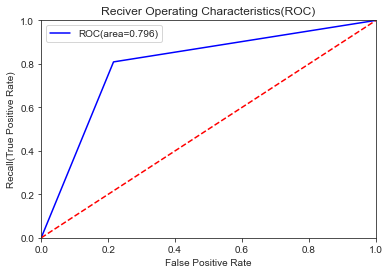

AUC: 0.7964702612562535


In [55]:
#ROC_AUC Curve:-
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_smote_v,cv_pred)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

**Classification Report:-**

In [56]:
#Classification Report:-
scores=classification_report(y_smote_v,cv_pred)
print(scores)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     35980
           1       0.79      0.81      0.80     35980

    accuracy                           0.80     71960
   macro avg       0.80      0.80      0.80     71960
weighted avg       0.80      0.80      0.80     71960



Observation:- As we see that f1 score is high for the customers who will not make a transaction, as well as who will make a transaction. 

**Model_performance on test data:-**

In [57]:
%%time
#Predicting the model-
X_test=df_test.drop(['ID_code'],axis=1)
smote_pred=smote.predict(X_test)
print(smote_pred)

[1 1 0 ... 0 0 1]
Wall time: 360 ms


**Observation:-** We can observe that the smote model is performing well on imbalance data as compare to logistic regression.

**Light GBM:-** It is a gradient boosting framework that uses tree based learning algorithm.

In [58]:
#Training data-
lgb_train=lgb.Dataset(X_train,label=y_train)

#Validation data-
lgb_valid=lgb.Dataset(X_valid,label=y_valid)

In [59]:
#Selecting best hyperparameters by tuning of different parameters:-
params={'boosting_type': 'gbdt', 
          'max_depth' : -1, #no limit for max_depth if <0
          'objective': 'binary',
          'boost_from_average':False, 
          'nthread': 20,
          'metric':'auc',
          'num_leaves': 50,
          'learning_rate': 0.01,
          'max_bin': 100,      #default 255
          'subsample_for_bin': 100,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'bagging_fraction':0.5,
          'bagging_freq':5,
          'feature_fraction':0.08,
          'min_split_gain': 0.45, #>0
          'min_child_weight': 1,
          'min_child_samples': 5,
          'is_unbalance':True,
          }

In [60]:
#Training lgbm model:-
num_rounds=10000
lgbm= lgb.train(params,lgb_train,num_rounds,valid_sets=[lgb_train,lgb_valid],verbose_eval=1000,early_stopping_rounds = 5000)
lgbm

[LightGBM] [Warning] feature_fraction is set=0.08, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.08
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=1 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] Using too small ``bin_construct_sample_cnt`` may encounter unexpected errors and poor accuracy.
[LightGBM] [Warning] feature_fraction is set=0.08, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.08
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=1 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Info] Number of positive: 16078, number of negative: 143922
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.242698 seconds.
You ca

**LGBM model performance on test data:-**

In [61]:
X_test=df_test.drop(['ID_code'],axis=1)
#Predict the model:-

#probability predictions
lgbm_predict_prob=lgbm.predict(X_test,random_state=42,num_iteration=lgbm.best_iteration)

#Convert to binary output 1 or 0
lgbm_predict=np.where(lgbm_predict_prob>=0.5,1,0)
print(lgbm_predict_prob)
print(lgbm_predict)

[0.33268384 0.42828476 0.3882975  ... 0.00660083 0.39425879 0.24656243]
[0 0 0 ... 0 0 0]


**Plotting of important Features:-**

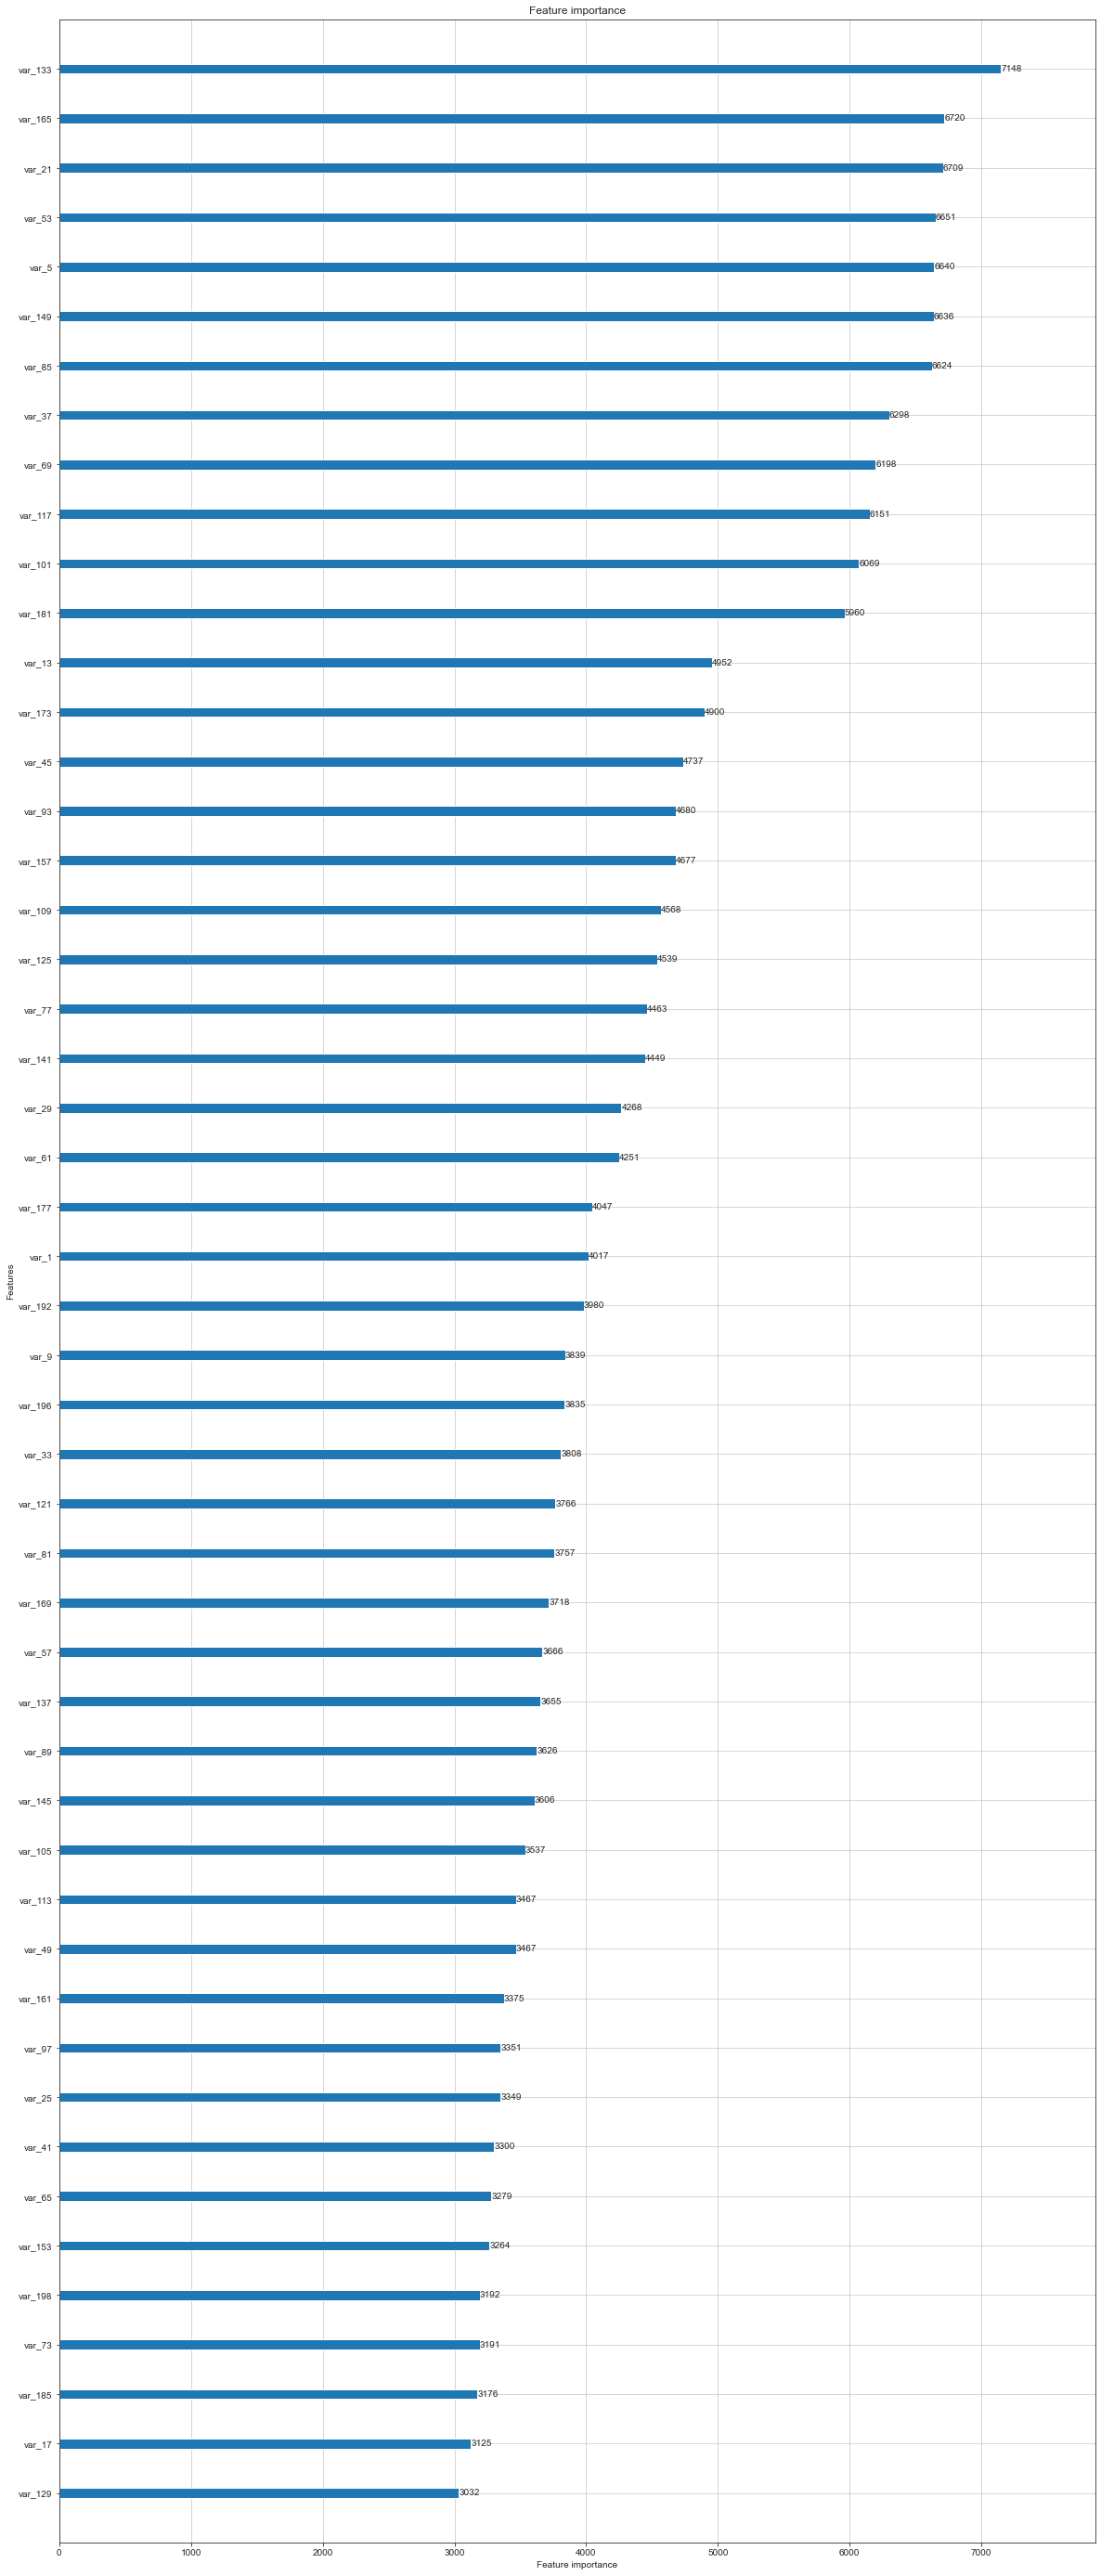

In [62]:
lgb.plot_importance(lgbm,max_num_features=50,importance_type="split",figsize=(20,50))

**Conclusion:-** We have tried with diff model like Logistic regression,smote & lightgbm. But we observed that light gbm is performing well on imbalanced data as compare to other models based on the roc_auc scores.

In [63]:
#Final submission:-
df_sub=pd.DataFrame({'ID_code':df_test['ID_code'].values})
df_sub['lgbm_predict_prob']=lgbm_predict_prob
df_sub['lgbm_predict']=lgbm_predict
df_sub.to_csv('submission.csv',index=False)
df_sub.head()

,ID_code,lgbm_predict_prob,lgbm_predict
0,test_0,0.332684,0
1,test_1,0.428285,0
2,test_2,0.388297,0
3,test_3,0.297809,0
4,test_4,0.043986,0
